In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.layouts import row, column

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Configuration des données

In [21]:
#importation des données ICI
secondmembres = np.vstack(np.array(pd.DataFrame(pd.read_pickle("SecondMember_test.pickle"))[0]))
solutions = np.vstack(np.array(pd.DataFrame(pd.read_pickle("OurSolutions_test.pickle"))[0]))

In [22]:
#Mise en forme des données
moyen_solutions = np.mean(solutions)
solutions = solutions/(8*moyen_solutions) + 3/8
moyen_solutions = np.mean(solutions)

#écart maximal entre les solutions 
val = (np.max(np.abs(solutions))-np.min(np.abs(solutions)))
print(val)

0.3037269436112302


In [23]:
#Normalize
scaler = StandardScaler()
secondmembres = scaler.fit_transform(secondmembres)

pb_train, pb_test, sol_train, sol_test = train_test_split(secondmembres, solutions, test_size = 0.2, random_state = 1)

In [25]:
# pb_train = np.reshape(secondmembres,(832,1,118714))
# pb_test = np.reshape(secondmembres,(1040-832,1,118714))

# Création du modèle

In [24]:
model = tf.keras.models.Sequential()

########## Add the layers ##########
model.add(tf.keras.layers.Dense(150, activation = "relu"))
model.add(tf.keras.layers.Dense(100, activation = "relu"))
model.add(tf.keras.layers.Dense(1,activation = "sigmoid"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [25]:
########## Define the loss function ##########
model.compile(
        loss = "mean_squared_error",
        optimizer = "sgd",
        metrics = ["mean_squared_error"]
        )

# Entraînement du modèle

In [26]:
########### Train the model ##########
history = model.fit(pb_train, sol_train, epochs = 10, validation_split = 0.3)

Train on 582 samples, validate on 250 samples
Epoch 1/10
582/582 [==============================] - 3s 5ms/sample - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 2/10
582/582 [==============================] - 2s 4ms/sample - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 3/10
582/582 [==============================] - 2s 4ms/sample - loss: 5.2735e-04 - mean_squared_error: 5.2735e-04 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 4/10
582/582 [==============================] - 2s 3ms/sample - loss: 2.7190e-04 - mean_squared_error: 2.7190e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 5/10
582/582 [==============================] - 2s 4ms/sample - loss: 1.4553e-04 - mean_squared_error: 1.4553e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 6/10
582/582 [==============================] - 2s 4ms/sample - loss: 8.5951e-05 - mean_squared_error: 8

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  17807250  
_________________________________________________________________
dense_1 (Dense)              multiple                  15100     
_________________________________________________________________
dense_2 (Dense)              multiple                  101       
Total params: 17,822,451
Trainable params: 17,822,451
Non-trainable params: 0
_________________________________________________________________


# Visualisation des performances du modèle

In [ ]:
#loss_curve = history.history["loss"]
#acc_curve = history.history["acc"]
#loss_val_curve = history.history["val_loss"]
#acc_val_curve = history.history["val_acc"]
#
#plt.plot(loss_curve, label = "Train")
#plt.plot(loss_val_curve, label = "Val")
#plt.legend(loc = 'upper left')
##plt.title("Loss")
#plt.show()
#
#plt.plot(acc_curve, label = "Train")
#plt.plot(acc_val_curve, label = "Val")
#plt.legend(loc = 'upper left')
##plt.title("Accuracy")
#plt.show()

# Évaluation du modèle

In [28]:
a = model.evaluate(pb_test, sol_test)

208/208 [==============================] - 0s 2ms/sample - loss: 0.0012 - mean_squared_error: 0.0012


# Sauvegarde du modèle

In [29]:
model.save("test1.h5")

# Recherche du meilleur modèle

In [ ]:
# La 2 ème couche

loss = [];

for i in range(50,1001,50):
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(i, activation = "relu"))
    model.add(tf.keras.layers.Dense(100, activation = "relu"))
    model.add(tf.keras.layers.Dense(1,activation = "sigmoid"))
    
    model.compile(
        loss = "mean_squared_error",
        optimizer = "sgd",
        metrics = ["mean_squared_error"]
        )
    
    history = model.fit(pb_train, sol_train, epochs = 10, validation_split = 0.3)
    
    loss.append(model.evaluate(pb_test, sol_test)[1])

Train on 582 samples, validate on 250 samples
Epoch 1/10
582/582 [==============================] - 2s 3ms/sample - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 2/10
582/582 [==============================] - 2s 3ms/sample - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 3/10
582/582 [==============================] - 1s 3ms/sample - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 4/10
582/582 [==============================] - 1s 3ms/sample - loss: 6.1565e-04 - mean_squared_error: 6.1565e-04 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 5/10
582/582 [==============================] - 1s 2ms/sample - loss: 4.0897e-04 - mean_squared_error: 4.0897e-04 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 6/10
582/582 [==============================] - 2s 3ms/sample - loss: 2.8247e-04 - mean_squared_error: 2.8247e-0

582/582 [==============================] - 2s 4ms/sample - loss: 8.5608e-05 - mean_squared_error: 8.5608e-05 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 6/10
582/582 [==============================] - 2s 4ms/sample - loss: 4.7366e-05 - mean_squared_error: 4.7366e-05 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 7/10
582/582 [==============================] - 2s 4ms/sample - loss: 2.3182e-05 - mean_squared_error: 2.3182e-05 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 8/10
582/582 [==============================] - 2s 4ms/sample - loss: 1.1986e-05 - mean_squared_error: 1.1986e-05 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 9/10
582/582 [==============================] - 2s 4ms/sample - loss: 6.8214e-06 - mean_squared_error: 6.8214e-06 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 10/10
208/208 [==============================] - 0s 2ms/sample - loss: 0.0017 - mean_squared_error: 0.0017
Train on 582 samples, validate on 250 

582/582 [==============================] - 5s 8ms/sample - loss: 3.5107e-06 - mean_squared_error: 3.5107e-06 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 10/10
208/208 [==============================] - 1s 3ms/sample - loss: 0.0024 - mean_squared_error: 0.0024
Train on 582 samples, validate on 250 samples
Epoch 1/10
582/582 [==============================] - 5s 8ms/sample - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 2/10
582/582 [==============================] - 5s 8ms/sample - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 3/10
582/582 [==============================] - 5s 8ms/sample - loss: 2.9488e-04 - mean_squared_error: 2.9488e-04 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 4/10
582/582 [==============================] - 5s 8ms/sample - loss: 9.8151e-05 - mean_squared_error: 9.8151e-05 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 5/

In [ ]:
# L'index de l'érreur la plus petite
print(np.argmin(loss))

#L'érreur la plus petit
print(np.argmin(loss))

In [ ]:
#Visualisation de résultat
plt.plot(loss)

In [ ]:
# La 1 ère couche

loss = [];

for j in range(50,1001,50):
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(250, activation = "relu"))
    model.add(tf.keras.layers.Dense(j, activation = "relu"))
    model.add(tf.keras.layers.Dense(1,activation = "sigmoid"))
    
    model.compile(
        loss = "mean_squared_error",
        optimizer = "sgd",
        metrics = ["mean_squared_error"]
        )
    
    history = model.fit(pb_train, sol_train, epochs = 10, validation_split = 0.3)
    
    loss.append(model.evaluate(pb_test, sol_test)[1])

17
17


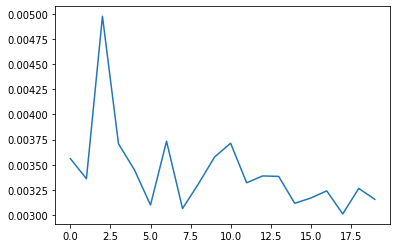

In [7]:
# L'index de l'érreur la plus petite
print(np.argmin(loss))

#L'érreur la plus petit
print(np.argmin(loss))

#Visualisation de résultat
plt.plot(loss)